In [1]:
# Imports needed for the project
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
# ALREADY DONE.
""" 
# Start by dropping the status and previously sold columns
df = pd.read_csv("data/realtor-data.csv")

# Drop the unwanted columns
df.drop(columns=["status", "prev_sold_date"], axis=1, inplace=True)

# Overwrite csv data
df.to_csv('data/realtor-data.csv', index=False)
"""

' \n# Start by dropping the status and previously sold columns\ndf = pd.read_csv("data/realtor-data.csv")\n\n# Drop the unwanted columns\ndf.drop(columns=["status", "prev_sold_date"], axis=1, inplace=True)\n\n# Overwrite csv data\ndf.to_csv(\'data/realtor-data.csv\', index=False)\n'

In [3]:
# Read the data
df = pd.read_csv("data/realtor-data.csv")

In [4]:
# See how many unknowns
missing_values_count = df.isna().sum()

# Print the count of missing values for each column
print(missing_values_count)

bed           216528
bath          194213
acre_lot      357467
city             191
state              0
zip_code         479
house_size    450112
price            108
dtype: int64


In [5]:
# Drop any NA data. This is fine for a personal project
df.dropna(inplace=True)

In [6]:
# Set X and Y
X = df.drop(columns=["price", "city", "zip_code"], axis=1)
y = df["price"]

In [7]:
X

,bed,bath,acre_lot,state,house_size
0,3.0,2.0,0.12,Puerto Rico,920.0
1,4.0,2.0,0.08,Puerto Rico,1527.0
2,2.0,1.0,0.15,Puerto Rico,748.0
3,4.0,2.0,0.10,Puerto Rico,1800.0
5,4.0,3.0,0.46,Puerto Rico,2520.0
...,...,...,...,...,...
1401060,3.0,1.0,0.10,New York,1002.0
1401062,4.0,2.0,0.36,New York,2026.0
1401063,10.0,4.0,0.43,New York,4802.0
1401064,2.0,2.0,0.14,New York,1568.0


In [8]:
# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=['state'])

"""
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

with open("oneScaler.pkl", "wb") as f:
    scaler = pickle.dump(scaler, f)
"""

'\nscaler = StandardScaler()\n\nX_scaled = scaler.fit_transform(X_encoded)\n\nwith open("oneScaler.pkl", "wb") as f:\n    scaler = pickle.dump(scaler, f)\n'

In [9]:
# Drop the original 'state' column
# X_scaled

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training KNN model and finding optimal parameters (COMPLETE)

In [11]:
# Create list for the results
valScores = []
models = []
testScores = []

In [12]:
# Perform CV on models
for k in range(1, 4):
    # Create and train model
    knnModel = KNeighborsRegressor(n_neighbors=k)
    knnModel.fit(X_train, y_train)
    
    # Predict on testing set
    y_pred = knnModel.predict(X_test)
    
    # Find MSE of testing set
    mse = mean_squared_error(y_test, y_pred)
    
    # Run 5 fold CV
    scores = cross_val_score(knnModel, X_train, y_train, cv=5)

    # Store scores, models, and test scores
    valScores.append(np.mean(scores))
    models.append(knnModel)
    testScores.append(mse)
    print(k)

1
2
3


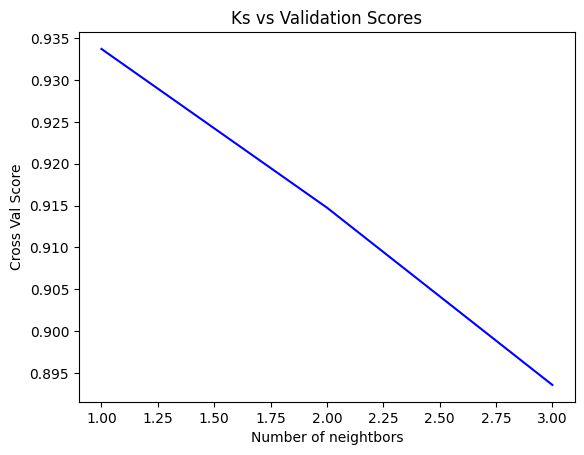

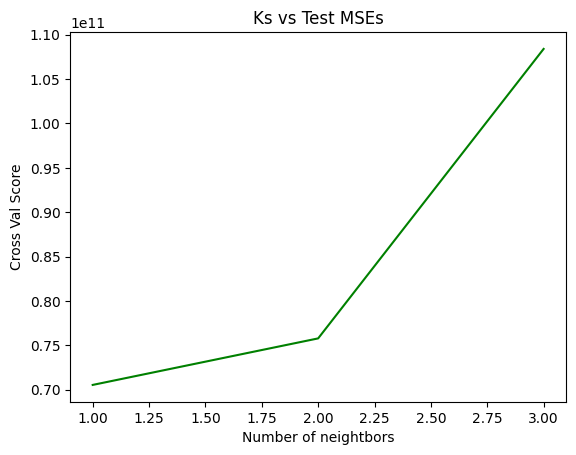

In [13]:
Ks = range(1, 4)
plt.plot(Ks, valScores, color="blue")
plt.title("Ks vs Validation Scores")
plt.xlabel("Number of neightbors")
plt.ylabel("Cross Val Score")
plt.show()


plt.plot(Ks, testScores, color="green")
plt.title("Ks vs Test MSEs")
plt.xlabel("Number of neightbors")
plt.ylabel("Cross Val Score")
plt.show()


## Optimal K value for KNN model according to various indicators:

In [14]:
# k = 1 produces the best model
bestK = 1

# Saving optimal model in a .pkl file

In [15]:
# Find index of model with min test error
model_num = np.argmin(testScores)

# Store the model that gives the best outcomes
with open("knn.pkl", "wb") as f:
    pickle.dump(models[model_num], f)

# Training linear and polynomial models to find optimal degree of graph

In [16]:
polyValScores = []
polyModels = []
polyTestMSE = []

for degree in range(1, 3):
    print(degree)
    # Initailize linReg and polyFeatures object
    polyFeatures = PolynomialFeatures(degree=degree)
    linReg = LinearRegression()
    
    # Create a pipeline
    pipeline = make_pipeline(polyFeatures, linReg)
    
    # Run cross validation on model
    cvScores = cross_val_score(pipeline, X_train, y_train)
    
    # Predict y values
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    polyModels.append(pipeline)
    polyValScores.append(np.mean(cvScores))
    polyTestMSE.append(mean_squared_error(y_test, y_pred))
    print(degree)

1
1
2
2


# Plot the Validation + Test Scores for Analysis

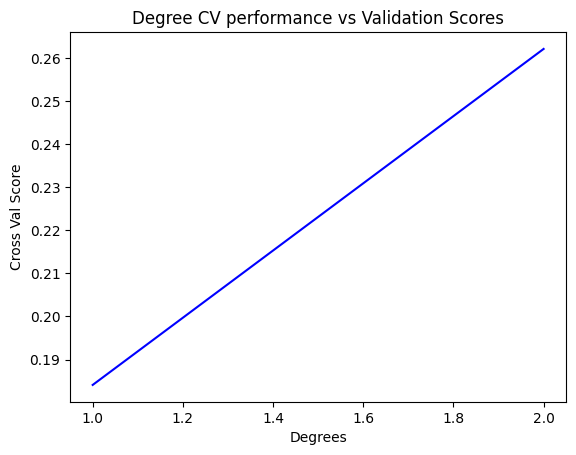

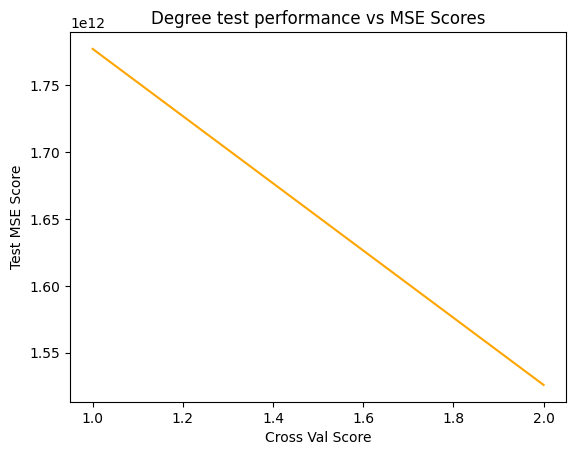

In [17]:
degrees = range(1, 3)

plt.plot(degrees, polyValScores, color="blue")
plt.title("Degree CV performance vs Validation Scores")
plt.xlabel("Degrees")
plt.ylabel("Cross Val Score")
plt.show()

plt.plot(degrees, polyTestMSE, color="orange")
plt.title("Degree test performance vs MSE Scores")
plt.xlabel("Cross Val Score")
plt.ylabel("Test MSE Score")
plt.show()

# Store the model into a pkl file for long term storage

In [18]:
# Find index of model with min test error
model_num = np.argmin(polyTestMSE)

# Store the model that gives the best outcomes
with open("poly.pkl", "wb") as f:
    print(model_num)
    pickle.dump(polyModels[model_num], f)

1


# Compare the two models in terms of errors

In [19]:
polyMin = min(polyTestMSE)
knnMin = min(testScores)

print(polyMin)
print(knnMin)

if knnMin < polyMin:
    print("KNN is the best")
else:
    print("Poly is the best")

1525989442443.385
70548136689.03362
KNN is the best
